 # 7. Adjoints

In [1115]:
from spb import plot
from spb.defaults import cfg
from sympy import (
    conjugate,
    cos,
    DotProduct,
    E,
    Eq,
    eye,
    Function,
    Idx,
    IndexedBase,
    Integral,
    Lambda,
    Matrix,
    MatrixSymbol,
    Ne,
    pi,
    sin,
    Sum,
    Symbol,
    symbols,
    Tuple
)

cfg['matplotlib']['show_minor_grid'] = True

In [1116]:
n = Symbol('n')

v = MatrixSymbol('v', 1, n)
u = MatrixSymbol('u', 1, n)
T = MatrixSymbol('T', n, n)

composite_1 = T*v.T
composite_2 = T*u.T

eq1_l = DotProduct(composite_1, u)
eq1_r = DotProduct(v, composite_2)

Eq(eq1_l, eq1_r)

Eq(DotProduct(T*v.T, u), DotProduct(v, T*u.T))

In [1117]:
v_mat = Matrix([[1, 2]])
u_mat = Matrix([[3, 4]])
T_mat = eye(2)

comp_1_sub = composite_1.subs({v: v_mat, T: T_mat}).doit()
eq1_l_subs = eq1_l.xreplace({composite_1: comp_1_sub, u: u_mat})

comp_2_sub = composite_2.subs({u: u_mat, T: T_mat}).doit()
eq1_r_subs = eq1_r.xreplace({composite_2: comp_2_sub, v: v_mat})

Eq(eq1_l_subs, eq1_r_subs)

Eq(DotProduct(Matrix([
[1],
[2]]), Matrix([[3, 4]])), DotProduct(Matrix([[1, 2]]), Matrix([
[3],
[4]])))

In [1118]:
Eq(eq1_l_subs, eq1_r_subs).doit()

True

In [1119]:
i = Idx('i')
j = Idx('j')

A = MatrixSymbol('T', 2, 2)
u_idx = IndexedBase('u')

eq2_l = A * u_idx[j]
eq2_r = Sum(u_idx[i] * A[i, j], (i, 0, 1))

eq2 = Eq(eq2_l, eq2_r, evaluate=False)
eq2

Eq(u[j]*T, Sum(u[i]*T[i, j], (i, 0, 1)))

In [1120]:
u_basis_2 = Tuple(*eye(2).rowspace())
A_subs = eye(2)

eq2_l_subs = eq2_l.subs({A: A_subs, u_idx: u_basis_2, j: 1}).doit()
eq2_r_subs = eq2_r.subs({A: A_subs, u_idx: u_basis_2, j: 1}).doit()

eq2.xreplace({eq2_l: eq2_l_subs, eq2_r: eq2_r_subs})

True

In [1121]:
k = Idx('k')
A3 = MatrixSymbol('T', 3, 3)
u_idx_m = IndexedBase('u')

dp = Function('dp')

eq3_l = dp(A3*u_idx_m[k], u_idx_m[j])
eq3_r = dp(u_idx_m[k], A3*u_idx_m[j])

eq3 = Eq(eq3_l, eq3_r, evaluate=False)
eq3

Eq(dp(u[k]*T, u[j]), dp(u[k], u[j]*T))

In [1122]:
u_basis_3 = Tuple(*eye(3).rowspace())
A3_subs = eye(3)

eq3_subs = {A3: A3_subs, u_idx_m: u_basis_3, j: 0, k: 1}
eq3.subs(eq3_subs).replace(dp, DotProduct).doit()

True

In [1123]:
eq4_r = dp(u_idx_m[k], Sum(u_idx_m[i] * A3[i, j], (i, 0, 1)))

eq4 = Eq(eq3_r, eq4_r)
eq4

Eq(dp(u[k], u[j]*T), dp(u[k], Sum(u[i]*T[i, j], (i, 0, 1))))

In [1124]:
eq4.subs(eq3_subs).doit().replace(dp, DotProduct)

True

In [1125]:
eq5 = Eq(eq4_r, A3[k, j])
eq5

Eq(dp(u[k], Sum(u[i]*T[i, j], (i, 0, 1))), T[k, j])

In [1126]:
eq5.subs(eq3_subs).doit().replace(dp, DotProduct).doit()

True

In [1127]:
delta = IndexedBase('δ')

eq6 = Eq(dp(u_idx_m[k], u_idx_m[i]), delta[k, i])
eq6

Eq(dp(u[k], u[i]), δ[k, i])

In [1128]:
eq6_subs = {u_idx_m: u_basis_3, i: 1, k: 2}
eq6.subs(eq6_subs).replace(dp, DotProduct).doit()

Eq(0, δ[2, 1])

In [1129]:
eq7 = Eq(dp(Sum(u_idx_m[i] * A3[k, i], (i, 0, 2)), u_idx_m[j]), A3[k, j])
eq7

Eq(dp(Sum(u[i]*T[k, i], (i, 0, 2)), u[j]), T[k, j])

In [1130]:
eq7.subs(eq3_subs).doit().replace(dp, DotProduct).doit()

True

In [1131]:
eq8_l = A3.T*u_idx_m[k]
eq8_r = Sum(u_idx_m[i]*A3[k, i], (i, 0, 2))

eq8 = Eq(eq8_l, eq8_r, evaluate=False)
eq8

Eq(u[k]*T.T, Sum(u[i]*T[k, i], (i, 0, 2)))

In [1132]:
eq8_l_subs = eq8_l.subs(eq3_subs).doit()
eq8_r_subs = eq8_r.subs(eq3_subs).doit()

eq8.xreplace({eq8_l: eq8_l_subs, eq8_r: eq8_r_subs})

True

In [1133]:
x = Symbol('x')

y = Function('y')

p = Function('p')
q = Function('q')
r = Function('r')

def L(y):
    return p(x)*y(x).diff(x, x) + r(x)*y(x).diff(x) + q(x)*y(x)

Ly = L(y)
Ly

p(x)*Derivative(y(x), (x, 2)) + q(x)*y(x) + r(x)*Derivative(y(x), x)

In [1134]:
y_sub = Lambda(x, (1/4)*E**(3*x) - (1/4)*E**(-x))

p_sub = Lambda(x, 1)
r_sub = Lambda(x, -2)
q_sub = Lambda(x, -3)

Ly_subs = L(y_sub).subs({r: r_sub, q: q_sub, p: p_sub})
Ly_subs

0

In [1135]:
z = Function('z')

def M(z):
    return p(x)*z(x).diff(x, x) - r(x)*z(x).diff(x) + q(x)*z(x)

Mz = M(z)
Mz

p(x)*Derivative(z(x), (x, 2)) + q(x)*z(x) - r(x)*Derivative(z(x), x)

In [1136]:
z_sub = Lambda(x, (1/4)*E**x - (1/4)*E**x)

Mz_subs = M(z_sub).subs({r: r_sub, q: q_sub, p: p_sub})
Mz_subs

0

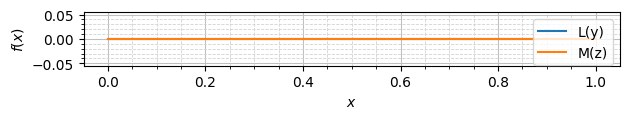

In [1137]:
plot(
    (Ly_subs.doit(), 'L(y)'),
    (Mz_subs.doit(), 'M(z)'),
    (x, 0, 1),
    aspect='equal'
)

In [1138]:
a, b = symbols('a, b')

yz_prod = Integral(y_sub.expr * z_sub.expr, (x, a, b))
yz_prod

Integral(0, (x, a, b))

In [1139]:
yz_prod.doit()

0

In [1140]:
Eq(
    Integral(Ly_subs * z_sub.expr, (x, a, b)),
    Integral(y_sub.expr * Mz_subs, (x, a, b))
)

True

In [1141]:
A = Matrix([[1., 2., 3.], [2., 4., 5.], [3., 5., 6.]])
A

Matrix([
[1.0, 2.0, 3.0],
[2.0, 4.0, 5.0],
[3.0, 5.0, 6.0]])

In [1142]:
A.is_symmetric()

True

In [1143]:
A.charpoly()

PurePoly(1.0*lambda**3 - 11.0*lambda**2 - 4.0*lambda + 1.0, lambda, domain='RR')

In [1144]:
roots = A.charpoly().all_roots()
roots

[CRootOf(lambda**3 - 11*lambda**2 - 4*lambda + 1, 0),
 CRootOf(x**3 - 11*x**2 - 4*x + 1, 1),
 CRootOf(x**3 - 11*x**2 - 4*x + 1, 2)]

In [1145]:
eigenvalue = roots[0]
eigenvalue

CRootOf(lambda**3 - 11*lambda**2 - 4*lambda + 1, 0)

In [1146]:
X = A.eigenvects()[1][2][0]
X

/home/zhanmusi/.local/share/virtualenvs/mfaf/lib/python3.11/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Matrix([
[ 0.736976229099578],
[ 0.327985277605682],
[-0.591009048506103]])

In [1147]:
Eq(
    (A*X).evalf(10),
    (X*eigenvalue).evalf(10)
)

True

In [1148]:
def star(X):
    if (X.is_Matrix):
        return X.T.applyfunc(conjugate)
    else:
        return conjugate(X)

Eq(
    (star(X)*star(A)).evalf(10),
    (star(eigenvalue)*star(X)).evalf(10)
)

True

In [1149]:
star(A).is_symmetric()

True

In [1150]:
Eq(
    (star(X)*A)*X,
    star(X)*(A*X)
)

True

In [1151]:
Eq(
    (star(eigenvalue)*(star(X)*X)).evalf(10),
    (eigenvalue*(star(X)*X)).evalf(10)
)

True

In [1152]:
Ne(X, 0)

True

In [1153]:
Ne(star(X)*X, 0)

True

In [1154]:
Eq(star(eigenvalue), eigenvalue)

True